In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


marvellous = pd.read_csv("/content/drive/MyDrive/DSlab/employees.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DSlab/employees.csv'

In [ ]:
marvellous.head()

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980


In [ ]:
#Emplo
print(len(marvellous["Employee_Code"].unique())/len(marvellous))
print(len(marvellous["Employee_No"].unique())/len(marvellous))

1.0
1.0




*   **Employee_No** and **Employee_code** are identifiers for each employee
*   **Name** and **Title** is not needed
*   Since the **title** is revealed by the **gender**






In [ ]:
marvellous.drop(["Employee_No","Employee_Code","Name", "Title"], axis=1, inplace=True)

# Removing the columns which have same values

Here We can see that the Religion ID and the Religion and the Desgination and the Designation Id are the same

In [ ]:
for x in list(marvellous["Religion_ID"].unique()):
    print(x)
    print(marvellous[marvellous["Religion_ID"]==x]["Religion"].unique())
    print("-------------")

1
['Buddhist']
-------------
4
['Catholic']
-------------
3
['Hindu']
-------------
5
['Muslim']
-------------


In [ ]:
for x in list(marvellous["Designation_ID"].unique()):

    if len(marvellous[marvellous["Designation_ID"]==x]["Designation"].unique()) != 1:
        print("Not unique")
        print(x)
        print("-----")

# Handling the Values in the Date of Birth


In [ ]:

marvellous["Year_of_Birth"] = marvellous["Year_of_Birth"].replace("'0000'", np.nan)


In [ ]:
marvellous["Year_of_Birth"] = pd.to_numeric(marvellous["Year_of_Birth"], errors='coerce')

<Axes: xlabel='Year_of_Birth', ylabel='Count'>

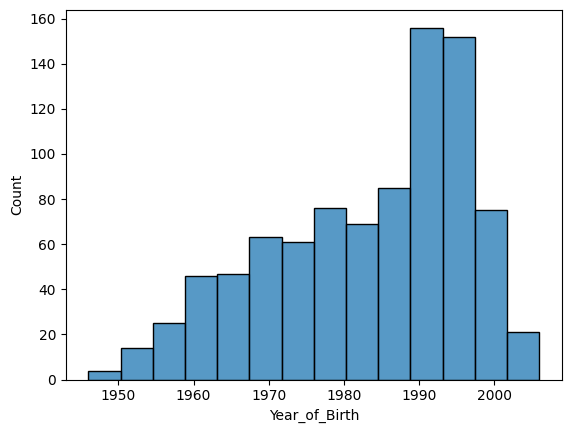

In [ ]:
sns.histplot(marvellous["Year_of_Birth"])

In [ ]:
age = 2023 - marvellous["Year_of_Birth"]

<Axes: xlabel='Marital_Status', ylabel='Year_of_Birth'>

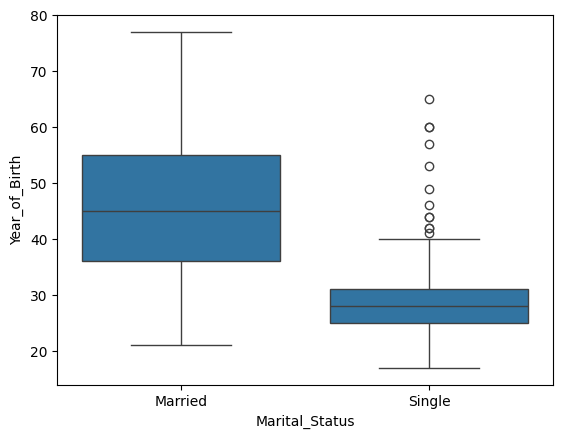

In [ ]:

#here we can see that the most of the married people have higher ages with compared with the unmarried
sns.boxplot(x="Marital_Status", y=age, data=marvellous)


<Axes: xlabel='Employment_Category', ylabel='Year_of_Birth'>

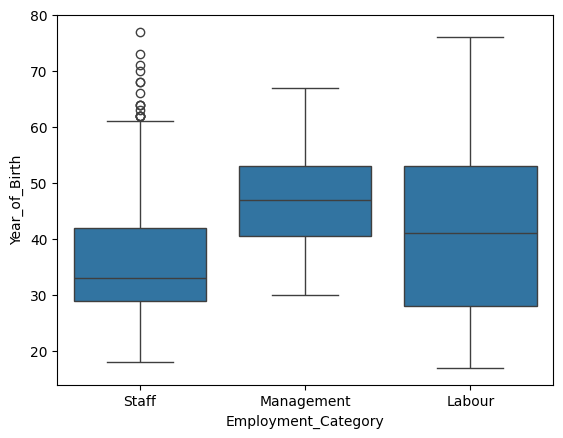

In [ ]:
sns.boxplot(marvellous, x="Employment_Category", y=age)
#management people have higher ages compared with the others

# Handling the Date Columns
Here I have got the date joined column to get the full working hours of the man

In [ ]:
marvellous['Date_Joined'] = pd.to_datetime(marvellous['Date_Joined'], errors='coerce')
marvellous['Date_Resigned'] = pd.to_datetime(marvellous['Date_Resigned'], errors='coerce')
marvellous['Inactive_Date'] = pd.to_datetime(marvellous['Inactive_Date'], errors='coerce')

<ipython-input-246-ff1001064df8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marvellous['Date_Resigned'] = pd.to_datetime(marvellous['Date_Resigned'], errors='coerce')
<ipython-input-246-ff1001064df8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marvellous['Inactive_Date'] = pd.to_datetime(marvellous['Inactive_Date'], errors='coerce')


In [ ]:

ages_in_the_company = (marvellous['Date_Resigned'] - marvellous['Date_Joined']).dt.days / 365
ages_in_the_company = ages_in_the_company.fillna((pd.to_datetime('2023-01-01') - marvellous['Date_Joined']).dt.days / 365)

marvellous["ages_in_the_company"] = ages_in_the_company


In [ ]:
#remove them we don't need it now
marvellous.drop(["Date_Joined", "Date_Resigned","Inactive_Date"], axis=1, inplace=True)

# Check the Reporting Cases

In [ ]:
z = np.where((marvellous["Reporting_emp_1"] != "\\N") | (marvellous["Reporting_emp_2"] != "\\N"), 1,0)
marvellous["reported"] = z
marvellous.drop(["Reporting_emp_1","Reporting_emp_2", "Religion", "Designation"], axis=1, inplace=True)
#religion destinations are also removed since we have the encded data


# Adding Binary and the Ordinal encoding

In [ ]:
Gender_map = {"Male":1, "Female":0}
Status_map = {"Inactive":0, "Active":1}
Employment_Category_map = {"Labour":1, "Staff":2, "Management":3}
marvellous["Gender"] = marvellous["Gender"].map(Gender_map)
marvellous["Status"] = marvellous["Status"].map(Status_map)
marvellous["Employment_Category"] = marvellous["Employment_Category"].map(Employment_Category_map)


#one hot encoding


*   Marital Status
*   Employment Type



In [ ]:

one_hot = pd.get_dummies(marvellous["Marital_Status"], prefix="Marital_Status")
marvellous = pd.concat([marvellous, one_hot], axis=1)
marvellous.drop("Marital_Status", axis=1, inplace=True)

one_hot = pd.get_dummies(marvellous["Employment_Type"], prefix="Employment_Type")
marvellous = pd.concat([marvellous, one_hot], axis=1)
marvellous.drop("Employment_Type", axis=1, inplace=True)


In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import KNNImputer

# Create a copy of the dataframe
df = marvellous.copy()



# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)

df.loc[:, :] = imputer.fit_transform(df)

# Add the imputed 'Year_of_Birth' column back

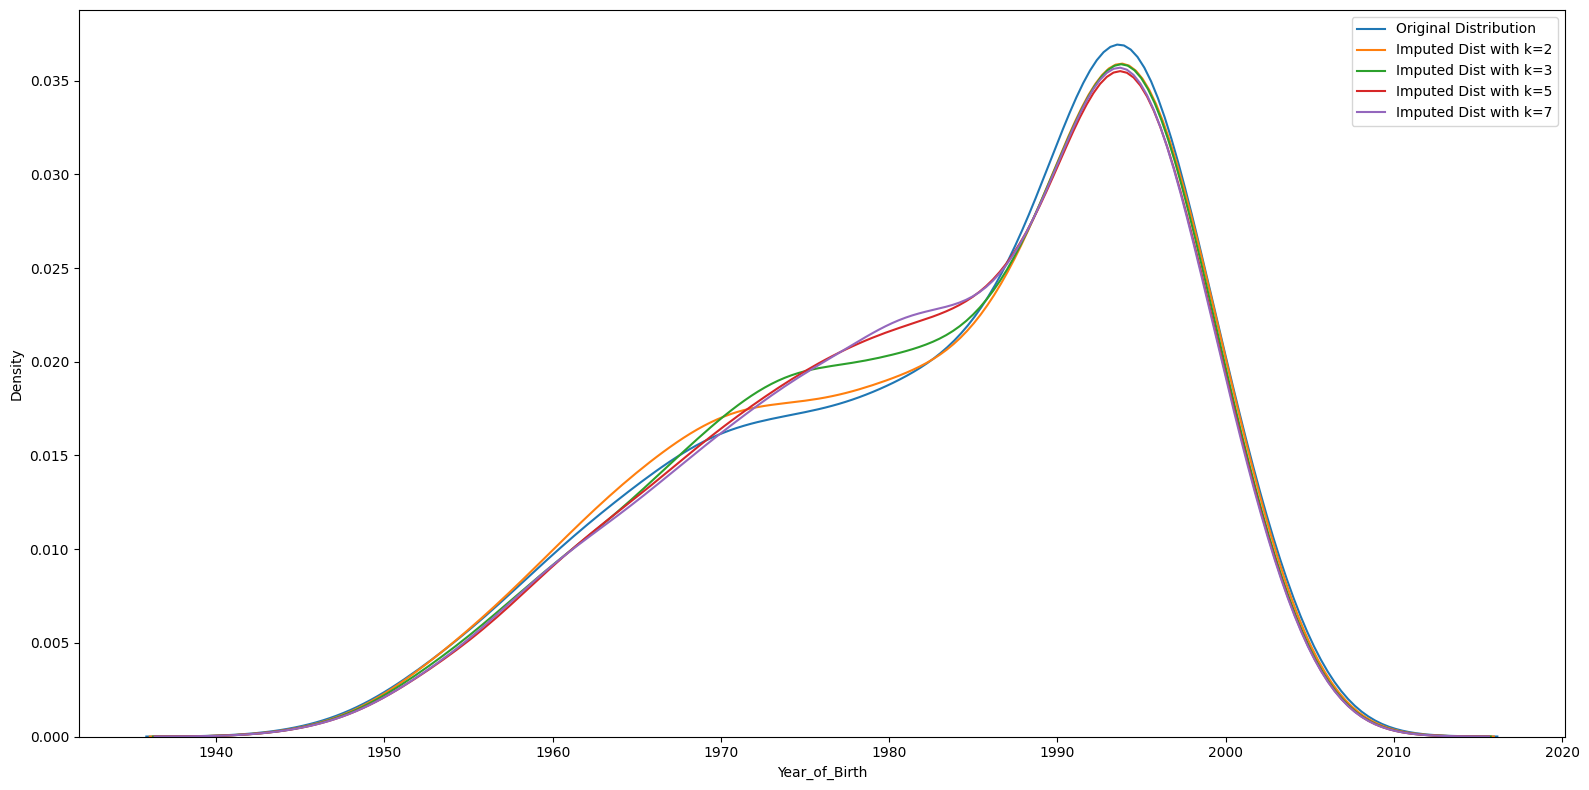

In [ ]:
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(marvellous["Year_of_Birth"], label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    df.loc[:, :] = knn_imp.fit_transform(marvellous)
    sns.kdeplot(df["Year_of_Birth"], label=f"Imputed Dist with k={k}", ax=ax)

plt.legend();
plt.tight_layout()
plt.show()

In [ ]:
imputer = KNNImputer(n_neighbors=2)

marvellous.loc[:, :] = imputer.fit_transform(df)
